In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

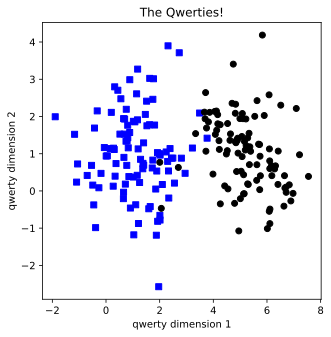

In [7]:
# create data

nPerCluster = 100
blur = 1

# center (origin) of the data on x-y plane
A = [1, 1]
B = [5, 1]

# generate data
a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# concatenate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1],'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1],'ko')
plt.title('The Qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [8]:
ANNClassify = nn.Sequential(
    nn.Linear(2,1), # the data is 2 dimensional (x value and y value)
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

learningRate = 0.01

lossFunction = nn.BCELoss()
# it's better to use BCEWithLogitsLoss, compared to using BCELoss with Sigmoid as an activation function. With BCEWithLogitsLoss,
# there's no need for nn.Sigmoid()

optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learningRate)

In [9]:
epochs = 1000
losses = torch.zeros(epochs)

for epoch in range(epochs):

    # forward pass
    yHat = ANNClassify(data)

    # compute loss
    loss = lossFunction(yHat, labels)
    losses[epoch] = loss

    # backpropagate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

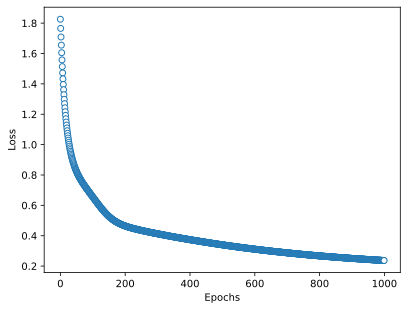

In [10]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [20]:
predictions = ANNClassify(data)

predictedLabels = predictions > 0.5 # returns true if > 0.5 otherwise false

# errors
missclassified = np.where(predictedLabels != labels)[0]

# total accuracy
totalAcc = 100 - (100*len(missclassified)/(2*nPerCluster))



95.0

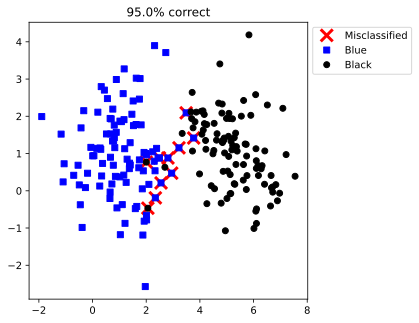

In [36]:

fig = plt.figure(figsize=(5,5))
plt.plot(data[missclassified, 0], data[missclassified, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')

plt.legend(['Misclassified', 'Blue', 'Black'], bbox_to_anchor = (1,1))
plt.title(f'{totalAcc}% correct')
plt.show()